## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

*Dataset Diambil dari Kaggle: https://www.kaggle.com/datasets/ghefirazahranur/data-gangguan-kecemasan-umum-gad-random-forest/data*

In [2]:
# Load dataset dari GitHub
url = 'https://raw.githubusercontent.com/Aryaagunawan/dataset/master/Data%20GAD%207.csv'
df = pd.read_csv(url)

# Tampilkan data awal
df

,Timestamp,Nama,Umur,Jenis Kelamin,"Merasa gugup, cemas, atau gelisah",Tidak dapat menghentikan kekhawatiran,Banyak mengkhawatirkan berbagai hal,Sulit merasa santai,Sangat gelisah sehingga sulit untuk diam,Mudah tersinggung dan mudah marah,Merasa takut seolah-olah sesuatu buruk akan terjadi
0,07/12/2023 18:46:01,Fathia Zata Nurul Amani,19,Perempuan,Beberapa Hari,Beberapa Hari,Hampir Setiap Hari,Beberapa Hari,Beberapa Hari,Beberapa Hari,Beberapa Hari
1,07/12/2023 18:57:29,Wa Ode Fera Verdina Putri Subarjo,19,Perempuan,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah
2,07/12/2023 19:00:59,Muhammad Faqhih Hafid Nur,18,Laki-Laki,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah,Tidak Pernah,Hampir Setiap Hari,Lebih dari Separuh Waktu yang ditentukan
3,07/12/2023 19:04:15,Adeliya zharah,18,Perempuan,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Beberapa Hari,Beberapa Hari,Beberapa Hari,Tidak Pernah,Lebih dari Separuh Waktu yang ditentukan
4,07/12/2023 19:05:18,Ahmad yasin,19,Laki-Laki,Beberapa Hari,Tidak Pernah,Tidak Pernah,Tidak Pernah,Beberapa Hari,Beberapa Hari,Beberapa Hari
...,...,...,...,...,...,...,...,...,...,...,...
665,26/12/2023 16:39:00,Bagas Ari,20,Laki-Laki,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Hampir Setiap Hari,Beberapa Hari,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Lebih dari Separuh Waktu yang ditentukan
666,27/12/2023 3:59:13,Anes,22,Laki-Laki,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Beberapa Hari,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari
667,29/12/2023 22:17:54,Hardin Lapagala,19,Laki-Laki,Beberapa Hari,Tidak Pernah,Tidak Pernah,Beberapa Hari,Beberapa Hari,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari
668,29/12/2023 22:18:48,Vira Sagita,18,Perempuan,Lebih dari Separuh Waktu yang ditentukan,Beberapa Hari,Beberapa Hari,Tidak Pernah,Tidak Pernah,Lebih dari Separuh Waktu yang ditentukan,Lebih dari Separuh Waktu yang ditentukan


Menampilkan informasi

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Timestamp                                            670 non-null    object
 1   Nama                                                 670 non-null    object
 2   Umur                                                 670 non-null    int64 
 3   Jenis Kelamin                                        670 non-null    object
 4   Merasa gugup, cemas, atau gelisah                    670 non-null    object
 5   Tidak dapat menghentikan kekhawatiran                670 non-null    object
 6   Banyak mengkhawatirkan berbagai hal                  670 non-null    object
 7   Sulit merasa santai                                  670 non-null    object
 8   Sangat gelisah sehingga sulit untuk diam             670 non-null    object
 9  

Insight:

- Ukuran Dataset: Dataset ini berisi 670 entri (baris) dengan 11 kolom data.

- Data Lengkap: Tidak ada nilai yang hilang (Non-Null Count sama dengan 670 untuk semua kolom), yang berarti dataset ini bersih dari missing values.

- Tipe Data:

  Kolom Umur bertipe numerik (int64).

  Kolom Timestamp, Nama, Jenis Kelamin, dan ketujuh pertanyaan GAD-7 (Merasa gugup, cemas, atau gelisah hingga Merasa takut seolah-olah sesuatu buruk akan terjadi) semuanya bertipe object, yang menunjukkan bahwa mereka adalah data teks atau kategorikal.

- Karakteristik Pertanyaan GAD-7: Jawaban untuk pertanyaan GAD-7 adalah kategorikal (misalnya, 'Beberapa Hari', 'Tidak Pernah'), yang mengindikasikan bahwa data ini perlu di-encode menjadi nilai numerik untuk pemrosesan model machine learning.

## Preprocessing Data

In [5]:
# Drop kolom yang tidak relevan
df_clean = df.drop(['Timestamp', 'Nama','Umur','Jenis Kelamin'], axis=1)

# Mapping jawaban ke skor numerik
map_jawaban = {
    'Tidak Pernah': 0,
    'Beberapa Hari': 1,
    'Lebih dari Separuh Waktu yang ditentukan': 2,
    'Hampir Setiap Hari': 3
}


pertanyaan_cols = df_clean.columns[:7]


for col in pertanyaan_cols:
    df_clean[col] = df_clean[col].map(map_jawaban)

# Hitung total skor dari semua pertanyaan GAD-7
df_clean['Total Skor'] = df_clean[pertanyaan_cols].sum(axis=1)

# Konversi total skor menjadi label tingkat kecemasan
def konversi_label(skor):
    if skor <= 4:
        return 'Normal'
    elif skor <= 9:
        return 'Ringan'
    elif skor <= 14:
        return 'Sedang'
    else:
        return 'Berat'

df_clean['Label Kecemasan'] = df_clean['Total Skor'].apply(konversi_label)

# Encode label kategori menjadi numerik (opsional untuk training model)
le = LabelEncoder()
df_clean['Label'] = le.fit_transform(df_clean['Label Kecemasan'])

# Tampilkan hasil preprocessing
print(df_clean.head())

# Tampilkan distribusi kelas target
print("\nDistribusi Tingkat Gangguan Kecemasan:")
print(df_clean['Label Kecemasan'].value_counts())

   Merasa gugup, cemas, atau gelisah  Tidak dapat menghentikan kekhawatiran  \
0                                  1                                      1   
1                                  0                                      0   
2                                  0                                      0   
3                                  2                                      1   
4                                  1                                      0   

   Banyak mengkhawatirkan berbagai hal  Sulit merasa santai  \
0                                    3                    1   
1                                    0                    0   
2                                    0                    0   
3                                    1                    1   
4                                    0                    0   

   Sangat gelisah sehingga sulit untuk diam  \
0                                         1   
1                                         0   
2    

In [6]:
print(df_clean.columns)

Index(['Merasa gugup, cemas, atau gelisah',
       'Tidak dapat menghentikan kekhawatiran',
       'Banyak mengkhawatirkan berbagai hal', 'Sulit merasa santai',
       'Sangat gelisah sehingga sulit untuk diam',
       'Mudah tersinggung dan mudah marah',
       'Merasa takut seolah-olah sesuatu buruk akan terjadi', 'Total Skor',
       'Label Kecemasan', 'Label'],
      dtype='object')


Insight:

- Penghapusan Kolom Tidak Relevan: Kolom-kolom seperti **Timestamp, Nama, Umur, dan Jenis Kelamin** telah dihapus, karena dianggap tidak relevan untuk analisis tingkat kecemasan GAD-7.

- Konversi Jawaban Kategorikal ke Numerik: Tujuh kolom pertanyaan GAD-7 yang awalnya berupa jawaban teks (kategorikal) seperti **Tidak Pernah, Beberapa Hari, dll**., telah berhasil di-mapping menjadi skor numerik (0, 1, 2, 3). Ini adalah langkah penting agar data dapat digunakan oleh model machine learning.

- Perhitungan Total Skor GAD-7: Sebuah kolom baru Total Skor telah dibuat dengan menjumlahkan skor dari ketujuh pertanyaan GAD-7. Kolom ini menjadi dasar untuk pengkategorian tingkat kecemasan.


- Kategorisasi Tingkat Kecemasan: Berdasarkan Total Skor, setiap responden dikategorikan ke dalam salah satu dari empat tingkat kecemasan: 'Normal' (≤4), 'Ringan' (≤9), 'Sedang' (≤14), atau 'Berat' (>14).

- Encoding Label: Label Kecemasan (kategorikal) telah di-encode menjadi representasi numerik (Label) untuk keperluan pelatihan model.

- Distribusi Tingkat Kecemasan: Setelah preprocessing, terlihat bahwa mayoritas responden berada pada tingkat kecemasan 'Sedang' (220 orang), diikuti oleh 'Ringan' (188), 'Berat' (175), dan 'Normal' (87). Ini menunjukkan adanya potensi ketidakseimbangan kelas, di mana kelas 'Normal' memiliki jumlah data yang paling sedikit.

- Kolom Akhir: DataFrame df_clean kini hanya berisi kolom-kolom pertanyaan GAD-7 (dalam bentuk numerik), Total Skor, Label Kecemasan (teks), dan Label (numerik).

## Visualisasi

Distribusi tingkat gangguan kecemasan menggunakan barplot dan pie chart

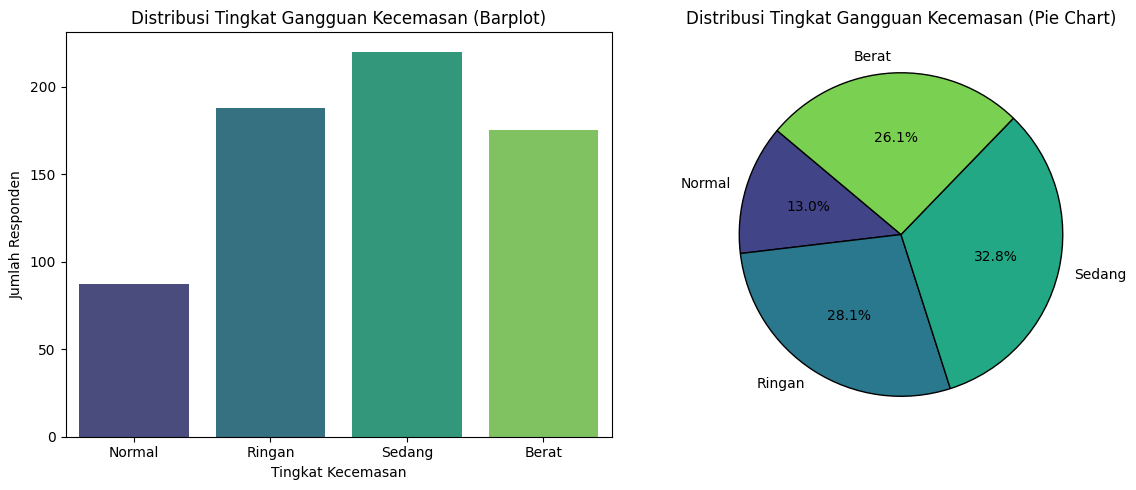

In [7]:
# Visualisasi distribusi tingkat gangguan kecemasan

plt.figure(figsize=(12, 5))

# Barplot
plt.subplot(1, 2, 1)
sns.countplot(data=df_clean, x='Label Kecemasan', order=['Normal', 'Ringan', 'Sedang', 'Berat'], palette='viridis')
plt.title('Distribusi Tingkat Gangguan Kecemasan (Barplot)')
plt.xlabel('Tingkat Kecemasan')
plt.ylabel('Jumlah Responden')

# Pie chart
plt.subplot(1, 2, 2)
labels = df_clean['Label Kecemasan'].value_counts().reindex(['Normal', 'Ringan', 'Sedang', 'Berat']).index
sizes = df_clean['Label Kecemasan'].value_counts().reindex(['Normal', 'Ringan', 'Sedang', 'Berat']).values
colors = sns.color_palette('viridis', len(labels))


plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Distribusi Tingkat Gangguan Kecemasan (Pie Chart)')

plt.tight_layout()
plt.show()

Heatmap Korelasi

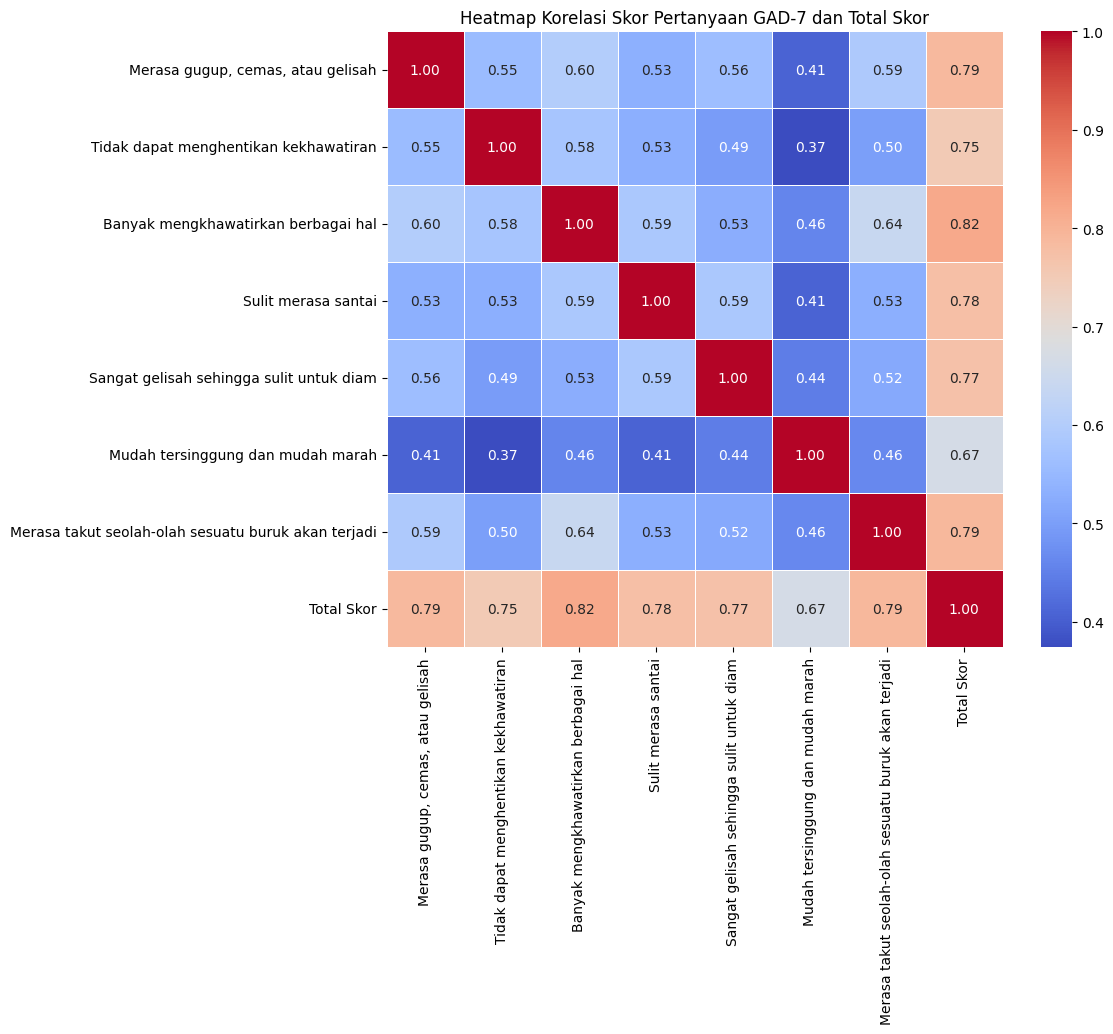

In [8]:
# Ambil kolom pertanyaan dan total skor untuk korelasi
cols_korelasi = list(pertanyaan_cols) + ['Total Skor']

# Hitung korelasi
corr = df_clean[cols_korelasi].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap Korelasi Skor Pertanyaan GAD-7 dan Total Skor')
plt.show()

## Modeling

Split Data

In [9]:
# Semua kolom pertanyaan GAD-7 (7 fitur)
X = df_clean[pertanyaan_cols]  # pake semua kolom pertanyaan

y = df_clean['Label']

# Split data tetap sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Random Forest

 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.94      0.88      0.91        17
           2       0.84      0.95      0.89        38
           3       0.93      0.89      0.91        44

    accuracy                           0.92       134
   macro avg       0.93      0.91      0.92       134
weighted avg       0.92      0.92      0.92       134

 Accuracy: 0.9179


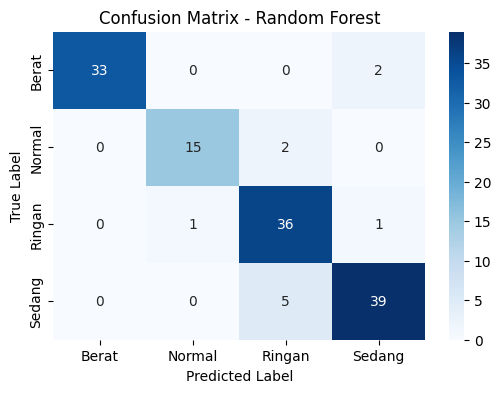

In [10]:
# Buat model dan latih
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
rf_pred = rf_model.predict(X_test)

# Evaluasi
print(" Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
rf_acc = accuracy_score(y_test, rf_pred)
print(f" Accuracy: {rf_acc:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


KNN (K-Nearest Neighbors)

 KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.89      0.94      0.91        17
           2       0.83      0.92      0.88        38
           3       0.90      0.86      0.88        44

    accuracy                           0.90       134
   macro avg       0.91      0.91      0.91       134
weighted avg       0.91      0.90      0.90       134

 Accuracy: 0.9030


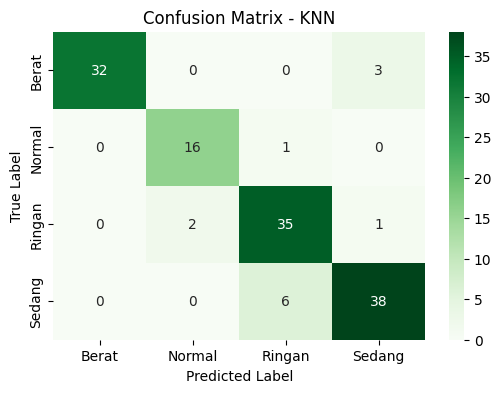

In [11]:
# Buat model dan latih
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prediksi
knn_pred = knn_model.predict(X_test)

# Evaluasi
print(" KNN Classification Report:")
print(classification_report(y_test, knn_pred))
knn_acc = accuracy_score(y_test, knn_pred)
print(f" Accuracy: {knn_acc:.4f}")

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Bandingkan Model

In [12]:
print("===== Model Comparison =====")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")

if rf_acc > knn_acc:
    print("\n Model terbaik: Random Forest")
    best_model = rf_model
else:
    print("\n Model terbaik: KNN")
    best_model = knn_model

===== Model Comparison =====
Random Forest Accuracy: 0.9179
KNN Accuracy: 0.9030

 Model terbaik: Random Forest


Insight:

- Pembagian Data: Data yang telah diproses dibagi menjadi set pelatihan (80%) dan set pengujian (20%) menggunakan train_test_split dengan random_state=42 dan stratify=y untuk memastikan distribusi kelas target yang seimbang di kedua set.

- Pemodelan Random Forest:
Model RandomForestClassifier dilatih dengan 100 estimator.
Model ini menunjukkan kinerja yang sangat baik dengan akurasi 0.9179.
Classification Report menunjukkan metrik yang kuat di semua kelas, dengan presisi dan recall yang tinggi, terutama untuk kelas 0 (Normal) yang mencapai 1.00 presisi dan 0.94 recall.
Confusion Matrix divisualisasikan untuk menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

- Pemodelan K-Nearest Neighbors (KNN):
Model KNeighborsClassifier dilatih dengan n_neighbors=5.
Model ini mencapai akurasi 0.9030, sedikit lebih rendah dari Random Forest.
Classification Report juga menunjukkan kinerja yang baik, namun Random Forest sedikit unggul dalam presisi dan f1-score secara keseluruhan.
Confusion Matrix divisualisasikan untuk model KNN.

- Perbandingan Model:
Berdasarkan akurasi, Random Forest (0.9179) diidentifikasi sebagai model terbaik dibandingkan dengan KNN (0.9030). Oleh karena itu, model Random Forest akan dipilih untuk implementasi lebih lanjut.

In [13]:
# Simpan model terbaik (Random Forest) ke file
joblib.dump(best_model, 'random_forest_gad7_model.joblib')
print("Model Random Forest berhasil disimpan sebagai 'random_forest_gad7_model.joblib'")

# Simpan LabelEncoder untuk label kategori
joblib.dump(le, 'label_encoder.joblib')
print("LabelEncoder berhasil disimpan sebagai 'label_encoder.joblib'")

Model Random Forest berhasil disimpan sebagai 'random_forest_gad7_model.joblib'
LabelEncoder berhasil disimpan sebagai 'label_encoder.joblib'
